##K nearest neighbour
 
- run the k nearest neighbour algorithm for a range of values of k
- output the prediction and compare with the true values on the validation set
- choose best k and run the k nearest neighbour with smallest error on the validation set and use this k to compute estimate of accuracy on the test set.

In [15]:
import numpy as np
import pandas as pd

def data_cleaner(data):
    #remove the id, partlybad columns
    data.drop(["id","partlybad"],1,inplace=True)
    #set new index using the date column
    data.set_index(["date"],inplace=True)
    #add binary 'class2' col for event/non-event
    data["class2"] = np.where(data["class4"] == "nonevent", "nonevent","event")
    #arrange to put class2 col at the front
    cols = ['class2'] + [col for col in data if col != 'class2']
    data = data[cols]
    return data

In [16]:
import pandas as pd
import numpy as np

#load training data
url = "https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/train.csv"
npf_train_raw = pd.read_csv(url)
npf_train = data_cleaner(npf_train_raw)

#create feature array and target column for training data
X_train = npf_train.iloc[:,2:]
y_train = npf_train["class2"]

#import validation data
npf_validation_raw = pd.read_csv("https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/validation.csv")
npf_validation = data_cleaner(npf_validation_raw)

#create feature array and target column for test data
X_validation = npf_validation.iloc[:,2:]
y_validation = npf_validation["class2"]

#import test data
npf_test_raw = pd.read_csv("https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/test.csv")
npf_test = data_cleaner(npf_test_raw)

#create feature array and target column for test data
X_test = npf_test.iloc[:,2:]
y_test = npf_test["class2"]

Run the k-nn algorithm for various values of k. Each iteration we are fitting the model to the training set, and then calculating the error on the validation set. Then we take the value of k with lowest error to fit the model to the test set. 

rate of correct predictions for k = 1 0.7441860465116279
rate of correct predictions for k = 2 0.7441860465116279
rate of correct predictions for k = 3 0.7558139534883721
rate of correct predictions for k = 4 0.7209302325581395
rate of correct predictions for k = 5 0.7441860465116279
rate of correct predictions for k = 6 0.7325581395348837
rate of correct predictions for k = 7 0.7558139534883721
rate of correct predictions for k = 8 0.7790697674418605
rate of correct predictions for k = 9 0.7441860465116279
rate of correct predictions for k = 10 0.7558139534883721
rate of correct predictions for k = 11 0.7441860465116279
rate of correct predictions for k = 12 0.7325581395348837
rate of correct predictions for k = 13 0.7093023255813954
rate of correct predictions for k = 14 0.7325581395348837
rate of correct predictions for k = 15 0.7441860465116279
rate of correct predictions for k = 16 0.7558139534883721
rate of correct predictions for k = 17 0.7558139534883721
rate of correct predict

(1.0, 40.0)

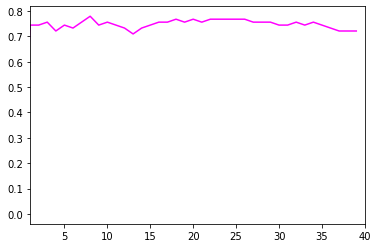

In [17]:
#k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt

#set up for storing error rate
pred_rate = np.zeros(40)

for k in range(1,40):
    #run algorithm
    knn = KNeighborsClassifier(n_neighbors=k) 
    #fit to training data
    knn.fit(X_train, y_train) 
    #predicted values for class2 on validation set
    y_predictions = knn.predict(X_validation)
    #compare predictions with actual results
    y_s = np.c_[y_validation,y_predictions]
    correct_ind = np.where(y_s[:,0] == y_s[:,1], 1,0)
    #find error on validation set
    pred_rate[k] = np.mean(correct_ind)
    print('rate of correct predictions for k = %i' %k,pred_rate[k])

f, ax = plt.subplots(1)
plt.plot(pred_rate,color="fuchsia")
ax.set_xlim(1, 40)

binary accuracy for 13-NN on test set= 0.8604651162790697


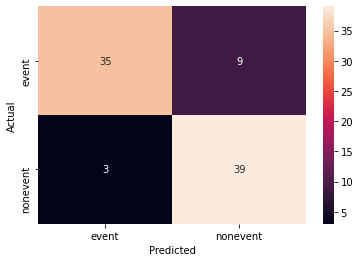

In [18]:
import seaborn as sns
#use k with lowest validation error 
#k=13
knn = KNeighborsClassifier(n_neighbors=13) 
#fit to training data
knn.fit(X_train, y_train) 

y_predictions = knn.predict(X_test)

#accuracy rate
from sklearn import metrics
#accuracy metric for the test set 
print('binary accuracy for 13-NN on test set=', metrics.accuracy_score(y_test, y_predictions))

#map predictions on heat map
confusion_matrix = pd.crosstab(y_test, y_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


Results
- Lowest validation error was given by k=13
- classifies well for non-event, less well for event days, predicts highly that they will be non-event. 

However, there is some inconsistency in the validation error and the test error. We would expect this to be similar, since the validation error should predict the error on the test set. 


accuracy for 13-NN on test set= 0.6627906976744186


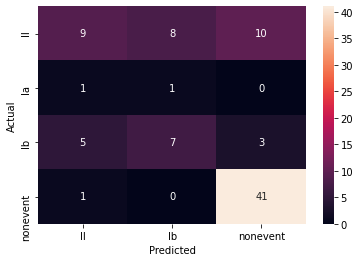

In [19]:
#repeat optimal k finding for multiclassifier
#try multi classifiers with k nearest

y_train_multi = npf_train["class4"]

y_test_multi = npf_test["class4"]

knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(X_train, y_train_multi) 

#predicted values for class4
y_predictions_multi = knn.predict(X_test)

confusion_matrix = pd.crosstab(y_test_multi, y_predictions_multi, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


print('accuracy for 13-NN on test set=', metrics.accuracy_score(y_test_multi, y_predictions_multi))